### Overview of main methods for tokenization and normalization using `NLTK`, `SpaCy` and `TextBlob`

In [1]:
from nlp.data import load_20news

In [2]:
data = load_20news()

In [3]:
print(data.data[0][:500], '\n...')
print(data.target[0], data.target_names[data.target[0]])



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a 
...
10 rec.sport.hockey


## Tokenization

### NLTK
[nltk tokenize](https://www.nltk.org/api/nltk.tokenize.html)

In [4]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize, word_tokenize, sent_tokenize

In [5]:
doc = 1
tokenizers = {'regexp': regexp_tokenize, 'wordpunct': wordpunct_tokenize, 'blank': blankline_tokenize, 'word': word_tokenize}
tokens = {}
for model, tokenizer in tokenizers.items():
    if model == 'regexp':
        tokens[model] = tokenizer(data.data[doc], r"\w+|\$[\d\.]+|\S+")
    else:
        tokens[model] = tokenizer(data.data[doc])

In [6]:
print(data.data[doc])
for model, example in tokens.items():
    print(f"{model:10} {example[:20]}")
    
for i, sentence in enumerate(sent_tokenize(data.data[doc])):
    print(f"SENTENCE {i+1}:{[sentence]}")    

My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

regexp     ['My', 'brother', 'is', 'in', 'the', 'market', 'for', 'a', 'high', '-performance', 'video', 'card', 'that', 'supports', 'VESA', 'local', 'bus', 'with', '1', '-2MB']
wordpunct  ['My', 'brother', 'is', 'in', 'the', 'market', 'for', 'a', 'high', '-', 'performance', 'video', 'card', 'that', 'supports', 'VESA', 'local', 'bus', 'with', '1']
blank      ['My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:', '- Diamond Stealth Pro Local Bus', '- Orchid Farenheit 1280', '- ATI Graphics Ultra Pro', '- Any other high-performance VLB card', 'Please post or email.  Thank you

## TextBlob
[Text Blob](https://textblob.readthedocs.io/en/dev/)

In [7]:
from textblob import TextBlob

In [8]:
blob = TextBlob(data.data[doc])
print(blob.words)
print()
for i, sentence in enumerate(blob.sentences):
    print(f"SENTENCE {i+1}:{[sentence]}")

['My', 'brother', 'is', 'in', 'the', 'market', 'for', 'a', 'high-performance', 'video', 'card', 'that', 'supports', 'VESA', 'local', 'bus', 'with', '1-2MB', 'RAM', 'Does', 'anyone', 'have', 'suggestions/ideas', 'on', 'Diamond', 'Stealth', 'Pro', 'Local', 'Bus', 'Orchid', 'Farenheit', '1280', 'ATI', 'Graphics', 'Ultra', 'Pro', 'Any', 'other', 'high-performance', 'VLB', 'card', 'Please', 'post', 'or', 'email', 'Thank', 'you', 'Matt']

SENTENCE 1:[Sentence("My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.")]
SENTENCE 2:[Sentence("Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.")]
SENTENCE 3:[Sentence("Thank you!")]
SENTENCE 4:[Sentence("- Matt")]


### SpaCy
[SpaCy](https://spacy.io/)

In [9]:
import spacy

In [10]:
nlp = spacy.load("en_core_web_lg")

In [11]:
document = nlp(data.data[doc])
print(list(document)[:20])
print()
for i, sentence in enumerate(document.sents):
    print(f"SENTENCE {i+1}:{[sentence]}")

[My, brother, is, in, the, market, for, a, high, -, performance, video, card, that, supports, 
, VESA, local, bus, with]

SENTENCE 1:[My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  ]
SENTENCE 2:[Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  ]
SENTENCE 3:[Thank you!

  - Matt
]


# Frequency

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set_theme(style="whitegrid")

In [13]:
from nlp.data import frequency

In [14]:
tokenizers = {
    'whitespace': lambda text: text.split(),
    'nltk': lambda text: word_tokenize(text),
    'lower': lambda text: [x.lower() for x in word_tokenize(text)]
}

In [15]:
output = {}
for model, tokenizer in tokenizers.items():
    output[model] = frequency(data.data, tokenizer=tokenizer)

In [25]:
output['whitespace'].sort_values(ascending=False)['well,']

305

In [17]:
for model, out in output.items():
    print(model, out.shape[0], out.sum(), out.shape[0] / out.sum())

whitespace 288723 3423145 0.08434436753336479
nltk 217350 4766093 0.04560339044999751
lower 193266 4766093 0.040550194887090954


In [18]:
output['nltk'].sum()

4766093

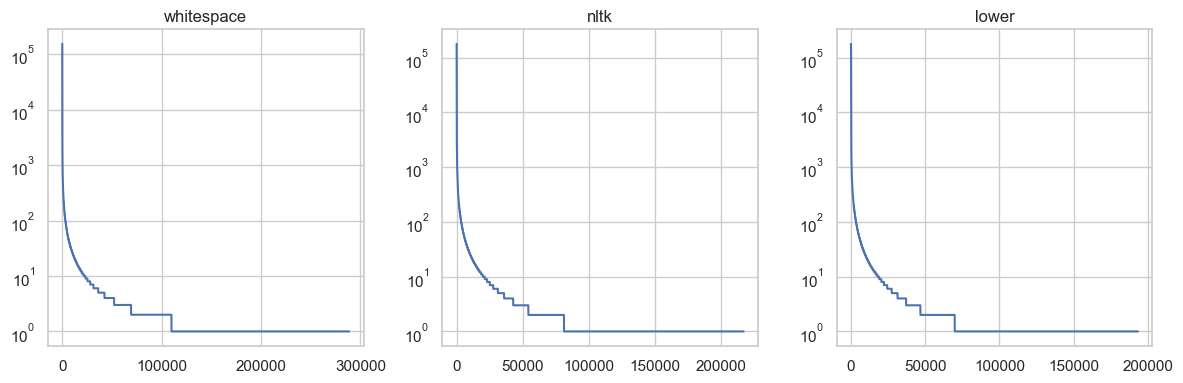

In [21]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
for i, (m, o) in enumerate(output.items()):
    o = o.sort_values(ascending=False)
    sns.lineplot(x=range(o.shape[0]), y=o.values, ax=ax[i])
    ax[i].set_yscale('log')
    ax[i].set_title(m)
plt.tight_layout()
plt.show()

In [32]:
import numpy as np

count = lambda word: output['nltk'].sort_values(ascending=False)[word]

print(count('Play'), np.log(count('Play') / output['nltk'].sum()))
print(count('play'), np.log(count('play') / output['nltk'].sum()))
print(count('plays'), np.log(count('plays') / output['nltk'].sum()))
print(count('playing'), np.log(count('playing') / output['nltk'].sum()))

21 -12.332515011945652
771 -8.729349076105747
103 -10.74230846143944
280 -9.742247846499826


In [37]:
from spacy.displacy import render

In [36]:
for token in document:
    print(token.text, token.lemma_, token.pos_)
    

My my PRON
brother brother NOUN
is be AUX
in in ADP
the the DET
market market NOUN
for for ADP
a a DET
high high ADJ
- - PUNCT
performance performance NOUN
video video NOUN
card card NOUN
that that PRON
supports support VERB

 
 SPACE
VESA VESA PROPN
local local ADJ
bus bus NOUN
with with ADP
1 1 NUM
- - SYM
2 2 NUM
MB MB PROPN
RAM RAM PROPN
. . PUNCT
    SPACE
Does do AUX
anyone anyone PRON
have have VERB
suggestions suggestion NOUN
/ / SYM
ideas idea NOUN
on on ADP
: : PUNCT


   

   SPACE
- - PUNCT
Diamond Diamond PROPN
Stealth Stealth PROPN
Pro Pro PROPN
Local Local PROPN
Bus Bus PROPN


   

   SPACE
- - PUNCT
Orchid Orchid PROPN
Farenheit Farenheit PROPN
1280 1280 NUM


   

   SPACE
- - PUNCT
ATI ATI PROPN
Graphics Graphics PROPN
Ultra Ultra PROPN
Pro Pro PROPN


   

   SPACE
- - PUNCT
Any any DET
other other ADJ
high high ADJ
- - PUNCT
performance performance NOUN
VLB VLB PROPN
card card NOUN



 


 SPACE
Please please INTJ
post post VERB
or or CCONJ
email email NOUN
. . PUN

In [39]:
render(nlp("the cat is on the table"))